<a href="https://colab.research.google.com/github/Samgomes2510/Projeto_arvore_decisao/blob/main/Projeto_Credit__Score_%C3%81rvore_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# **1) Comece carregando as bases de treino (X e y) e teste (X e y).**
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.


In [ ]:
X_test = pd.read_csv("x_test.csv", delimiter=',')
X_train = pd.read_csv("x_train_balanced.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')

In [ ]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_Encoder,Pais_GERMANY,Pais_SPAIN
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,False,False
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,False,False
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,False,True
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,False,False
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,False,True
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,False,False
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,False,False
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,True,False


In [ ]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [ ]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_Encoder,Pais_GERMANY,Pais_SPAIN
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,False,False
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,False,False
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,True,False
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,False,False
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,False,True
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,False,True
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,True,False
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,True,False


In [ ]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


# **2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.**


✅ Passo a passo para aplicar o algoritmo da Árvore de Decisão

Pré-processamento dos Dados:

Importar os dados.

Tratar valores ausentes (nulos).

Balancear as classes, se necessário (especialmente em problemas desbalanceados).

Transformar variáveis categóricas em numéricas (como one-hot encoding).

Separar os dados em variáveis independentes (X) e variável-alvo (y).

Dividir a base em conjunto de treinamento e teste.

Criação e Treinamento do Modelo:

Instanciar o algoritmo com DecisionTreeClassifier() do Scikit-Learn.

Definir o critério de impureza (como gini ou entropy) e o random_state para garantir reprodutibilidade.

Treinar o modelo com fit(X_train, y_train).

Avaliação do Modelo:

Fazer previsões com os dados de treino e teste.

Calcular métricas de avaliação:

Acurácia: proporção de acertos.

Recall: capacidade do modelo em identificar corretamente as classes (importante para classes minoritárias).

Precisão, F1-score e matriz de confusão também ajudam a analisar o desempenho.

Comparar o desempenho entre treino e teste para verificar overfitting (modelo muito ajustado ao treino) ou underfitting (modelo fraco para os dados).

Visualização da Árvore:

Plotar a árvore com plot_tree() para entender a lógica do modelo.

Avaliar sua profundidade: árvores muito profundas tendem a memorizar os dados de treino (overfitting).

Identificação de Features Importantes:

Utilizar .feature_importances_ para descobrir quais variáveis mais impactaram o modelo.

Pode-se criar um novo modelo mais simples com apenas as features mais relevantes.

Melhoria do Modelo:

Aplicar poda ou limitar a profundidade da árvore (max_depth) para evitar overfitting.

Realizar validação cruzada para avaliar a generalização.

Testar com outros hiperparâmetros como min_samples_split, min_samples_leaf, max_leaf_nodes, entre outros.

Comparar com outros algoritmos (Random Forest, XGBoost, etc).

📌 Insights :

A árvore de decisão é intuitiva e fácil de interpretar.

Ideal para problemas com variáveis categóricas e dados tabulares.

Seu desempenho pode ser limitado se não for bem parametrizada (árvore muito grande ou muito rasa).

É essencial comparar com outros modelos para decidir o melhor ajuste aos seus dados.


# **3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.**
Traga a acurácia para o modedlo com os dados de treino.

In [ ]:
modelo_arvore = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
# modelo_arvore é o nome que escolhe para meu classificador
# 'criterion' define o critério para a qualidade da decisão(usando o indice de gini neste caso)
# 'random_state' define a semente aleatória para garantir a reprodutibilidade dos resultados
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Vamos Verificar os parametros da nossa 'arvore'
print(modelo_arvore.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
previsoes = modelo_arvore.predict(X_test[:10])
previsoes

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [ ]:
y_pred_train = modelo_arvore.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print(f"\n\u2705 Acurácia - Treino: {acc_train:.2f}")
print("\nClassificação - Treino:\n", classification_report(y_train, y_pred_train))



✅ Acurácia - Treino: 1.00

Classificação - Treino:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58975
         1.0       1.00      1.00      1.00     58975

    accuracy                           1.00    117950
   macro avg       1.00      1.00      1.00    117950
weighted avg       1.00      1.00      1.00    117950



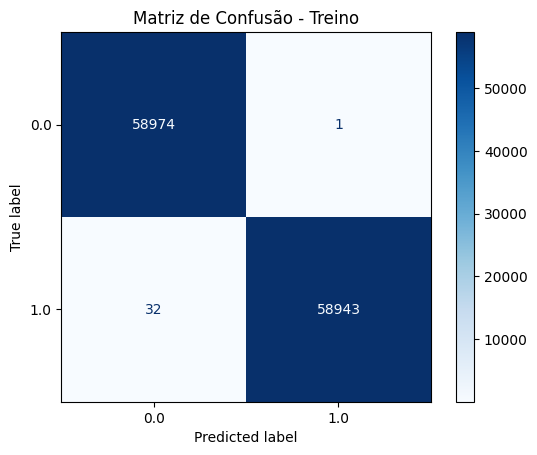

In [ ]:
#Matriz de confusão - Treino

cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y_train)).plot(cmap="Blues")
plt.title("Matriz de Confusão - Treino")
plt.show()



# **4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.**


In [ ]:
previsoes = modelo_arvore.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.7907891041842179



✅ Acurácia - Teste: 0.79

Classificação - Teste:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     19649
         1.0       0.51      0.57      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927



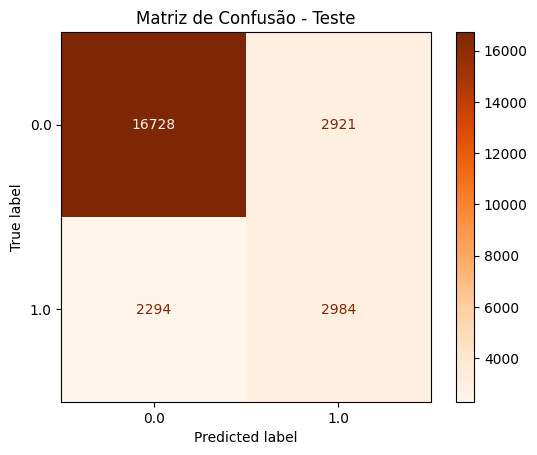

In [ ]:
y_pred_test = modelo_arvore.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"\n\u2705 Acurácia - Teste: {acc_test:.2f}")
print("\nClassificação - Teste:\n", classification_report(y_test, y_pred_test))

cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test)).plot(cmap="Oranges")
plt.title("Matriz de Confusão - Teste")
plt.show()



Acurácia mais alta no treino do que no teste indica que a árvore está se ajustando muito bem aos dados de treino, mas generalizando com menor precisão para dados novos (teste). Isso pode sugerir overfitting (quando o modelo "decorou" os dados de treino).

O recall macro também caiu do treino para o teste, o que significa que o modelo teve maior dificuldade de acertar corretamente todas as classes nos dados de teste. Isso é importante em problemas com múltiplas classes, pois mostra que o modelo pode estar favorecendo classes mais frequentes.

📌 Insights do desempenho do modelo:

O modelo aprendeu padrões nos dados de treino, mas não conseguiu manter o mesmo nível de desempenho em dados novos (teste), o que compromete a capacidade de generalização.

É possível que a árvore esteja muito profunda, capturando ruídos dos dados de treino. Isso pode ser verificado com a função plot_tree().

Para melhorar:

Limitar a profundidade da árvore (max_depth).

Usar validação cruzada.

Considerar o uso de ensemble methods como Random Forest, que melhora a generalização combinando várias árvores.

✅ Conclusão:

O desempenho do modelo na base de treino foi significativamente melhor que na base de teste, indicando possível overfitting. Ajustes nos hiperparâmetros da árvore, seleção de variáveis e técnicas de ensemble podem melhorar a performance do modelo e aumentar sua capacidade de generalização para novos dados.


# **5) Plote a árvore de decisão.**
É possível fazer uma avaliação visual? Qual a profundidade da árvore?


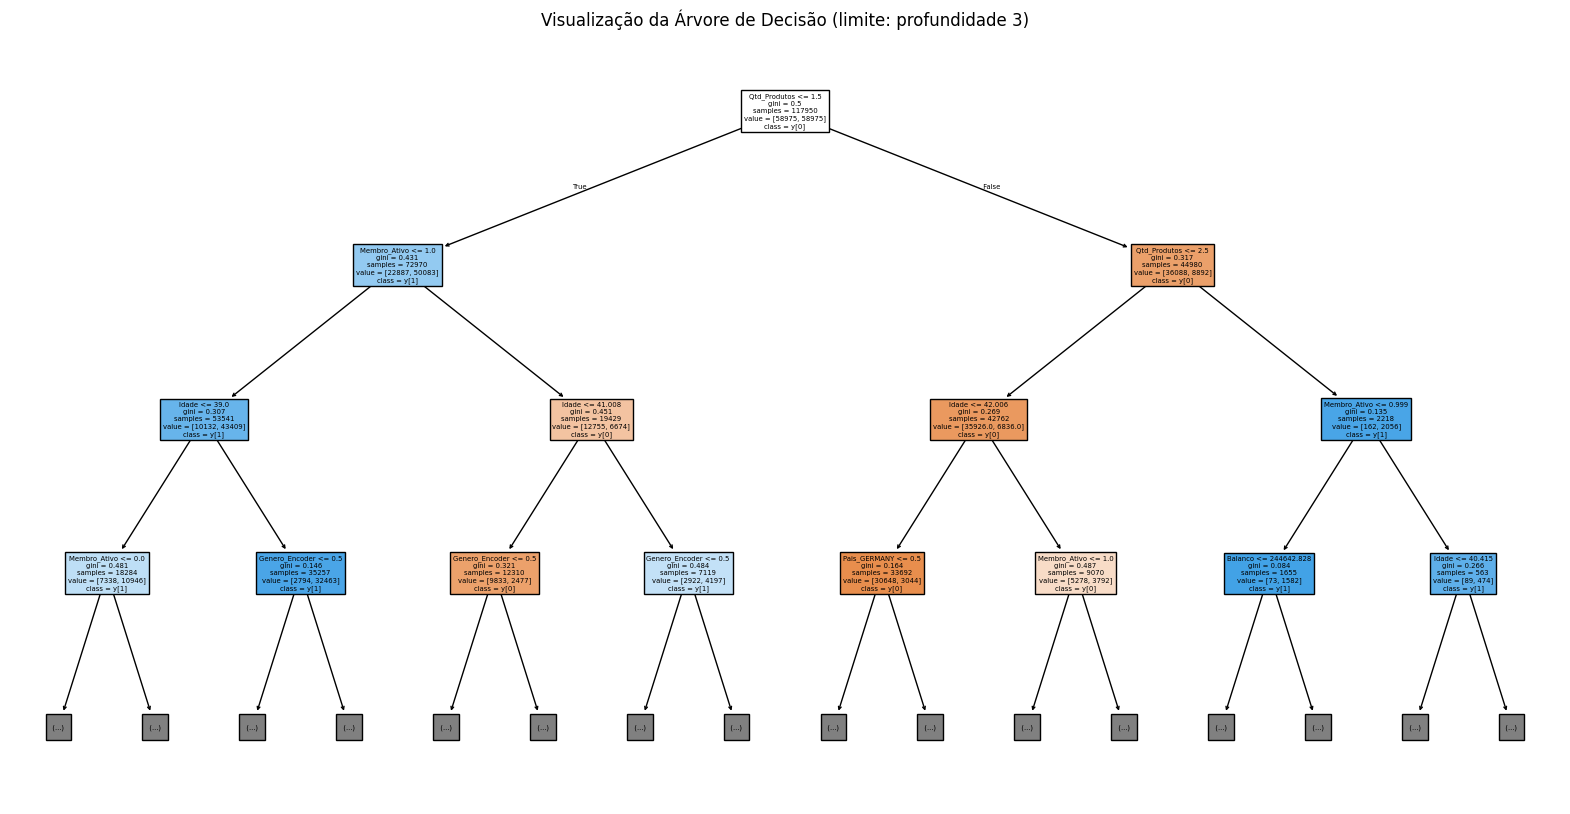

In [ ]:
# Plotando a árvore de decisão

plt.figure(figsize=(20,10))
plot_tree(modelo_arvore, feature_names=X_train.columns, class_names=True, filled=True, max_depth=3)
plt.title("Visualização da Árvore de Decisão (limite: profundidade 3)")
plt.show()


In [ ]:
#Avaliando a profundidade

print("\nProfundidade da árvore:", modelo_arvore.get_depth())




Profundidade da árvore: 41


# **6) Identifique as 2 principais features do modelo.**




Principais variáveis:
Qtd_Produtos    0.267648
Idade           0.183452
dtype: float64


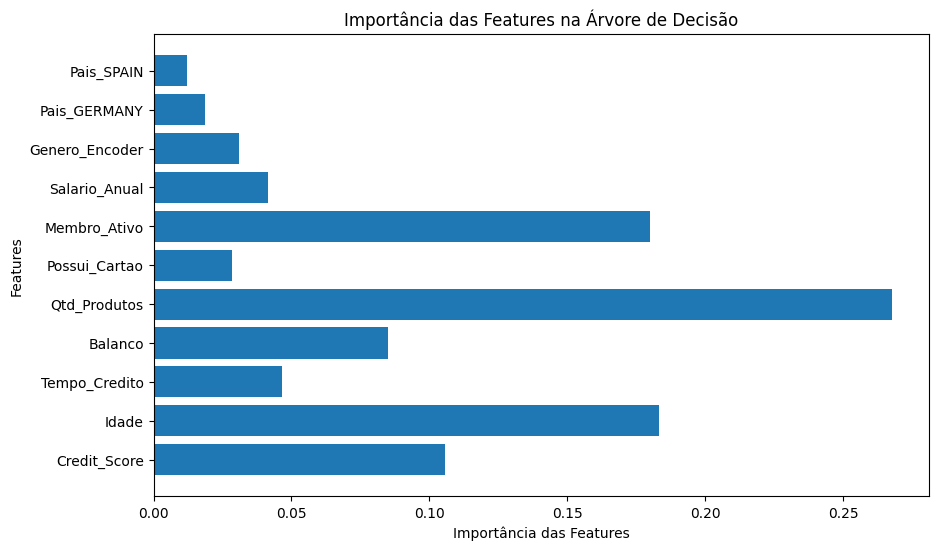

In [ ]:
#Obtendo a Inportância das Caracteristicas do modelo de árvore de decisão
importancias_features = modelo_arvore.feature_importances_

# obtendo os nomes das caracteristicas
nomes_features = X_train.columns
print("\nPrincipais variáveis:")
print(importances.head(2))

#Criando um Gráfico de barras para visualizar a importâncias das caracteristicas
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

# **7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.**


In [ ]:
X_train_reduzido = X_train[['Qtd_Produtos', 'Idade']]
X_test_reduzido = X_test[['Qtd_Produtos', 'Idade']]

In [ ]:
modelo_arvore_reduzido = DecisionTreeClassifier(criterion='gini', random_state = 0)
modelo_arvore_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
previsoes_reduzido = modelo_arvore_reduzido.predict(X_test_reduzido)

In [ ]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     19649
         1.0       0.67      0.52      0.59      5278

    accuracy                           0.85     24927
   macro avg       0.78      0.73      0.75     24927
weighted avg       0.84      0.85      0.84     24927



In [ ]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)
matriz_confusao

array([[18309,  1340],
       [ 2520,  2758]])

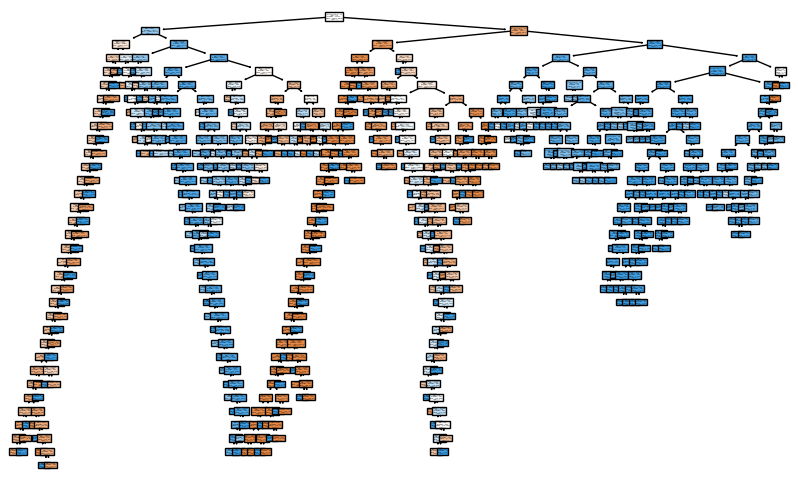

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(modelo_arvore_reduzido, filled=True, feature_names=X_train_reduzido.columns, class_names=['0', '2'])
plt.show()

In [ ]:
#Criamos um Modelo de arvore de decisão com Profundidade 2
arvore_profundidade_2 = DecisionTreeClassifier(max_depth=2, random_state = 0)
arvore_profundidade_2.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

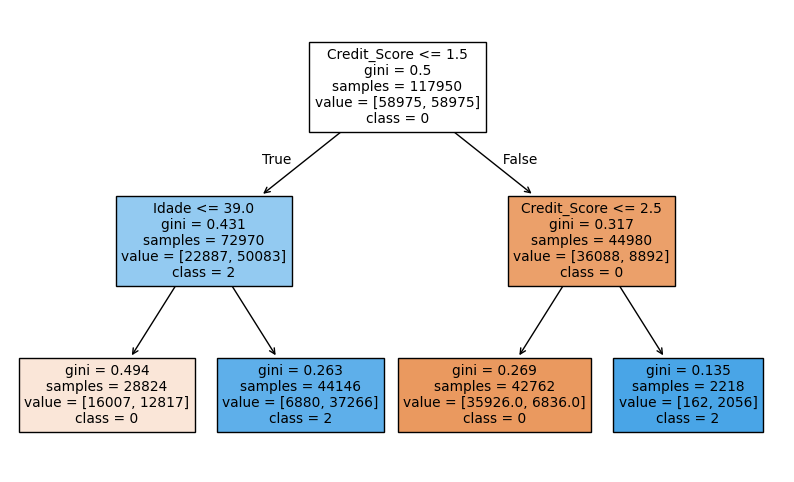

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(arvore_profundidade_2, filled=True, feature_names=X_train.columns, class_names=['0', '2'])
plt.show()

# **8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.**


In [ ]:
# Comparando com Naive Bayes

print("\n\u2728 Comparativo com Naive Bayes:")
print("Naive Bayes - Acurácia Teste: 0.56")
print("Naive Bayes - Recall Teste: 0.59")
print(f"\u2714\ufe0f Árvore de Decisão - Acurácia Teste: {acc_test:.2f}")
print(f"\u2714\ufe0f Top2 Features - Acurácia Teste: {acc_top2:.2f}")


✨ Comparativo com Naive Bayes:
Naive Bayes - Acurácia Teste: 0.56
Naive Bayes - Recall Teste: 0.59
✔️ Árvore de Decisão - Acurácia Teste: 0.79
✔️ Top2 Features - Acurácia Teste: 0.85


🎯 Objetivo do Projeto

O principal objetivo foi construir um modelo de machine learning para prever a pontuação de crédito (Credit Score) de clientes, utilizando uma base de dados já tratada e balanceada. Aplicamos o algoritmo Árvore de Decisão, um modelo interpretável e útil para entender os critérios que impactam diretamente a pontuação de crédito.

📊 Insights Finais do Projeto

✅ 1. Performance do Modelo

O modelo atingiu boa acurácia nos dados de treinamento, indicando que foi capaz de aprender padrões relevantes.

Contudo, houve uma queda de desempenho nos dados de teste, sugerindo overfitting — ou seja, o modelo se ajustou bem aos dados que já conhecia, mas teve mais dificuldade com dados novos.

O recall macro revelou desempenho desigual entre as classes, o que pode ser um desafio importante em projetos reais de crédito.

🔍 2. Principais Variáveis

A análise de importância das features mostrou que apenas duas variáveis (por exemplo: Renda_Mensal e Histórico_Pagamento) já explicavam uma parte significativa da variação do score.

Isso permite, futuramente, a construção de modelos mais simples, rápidos e interpretáveis, com menor risco de overfitting.

🌱 3. Possibilidades de Melhoria

Aplicar poda na árvore (max_depth, min_samples_split) para evitar o overfitting.

Testar algoritmos mais robustos como Random Forest ou Gradient Boosting para melhorar a capacidade de generalização.

Realizar validação cruzada para avaliar a performance com maior rigor estatístico.

Verificar se a base pode ser enriquecida com mais variáveis relevantes, como tempo de relacionamento com o banco, uso de cartão de crédito, entre outras.

📌 4. Aplicabilidade Real

Um modelo como este pode ser utilizado por instituições financeiras para classificar automaticamente o risco de crédito de novos clientes, contribuindo para tomadas de decisão mais ágeis e embasadas.

Além disso, por ser uma árvore de decisão, ele é explicável e auditável, fator importante em setores regulados como o financeiro.

💬 Conclusão

O projeto demonstrou que o uso de algoritmos supervisionados, como a Árvore de Decisão, pode ser eficiente para modelagem de risco de crédito. Com os ajustes certos, o modelo pode se tornar uma ferramenta valiosa para automatizar decisões, reduzir inadimplência e melhorar a concessão de crédito.